# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [5]:
# Resolver acá
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
# base tizi
#base_airbnb_original = pd.read_csv(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\CC408-T1-4\TP2 probar\TP2\Base Airbnb NY.csv")

# base angie
base_airbnb_original = pd.read_csv(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP2 probar/TP2/Base Airbnb NY.csv')

print(base_airbnb_original)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48900  19454344  Perfect ap in Manhattan! Walking to Central Park!  11670284   
48901  36224876                   Upper East Side Apt By The Water  46232598   
48902  21869051                        Comfy Apt in NYC Brownstone  97243693   
48903   3004563                                           The spot  15303460   
48904  19712687               Sunny, spacious, homey Brooklyn loft  11989253   

         host_name neighbourhood_group 

In [7]:
#elimino datos 
base_airbnb_limpia = base_airbnb_original.dropna()

#elimino datos duplicados
base_airbnb_limpia = base_airbnb_limpia.drop_duplicates()

#Elimino columnas que no nos interesan
# Los nombres del host ni del lugar, como los id, no nos interesan ya que no nos son relevantes a la hora de hacer predicciones 
base_airbnb_limpia = base_airbnb_limpia.drop(columns=['id','name','host_name','host_id'])

print(base_airbnb_limpia)

      neighbourhood_group    neighbourhood  latitude  longitude  \
0                Brooklyn       Kensington  40.64749  -73.97237   
1               Manhattan          Midtown  40.75362  -73.98377   
3                Brooklyn     Clinton Hill  40.68514  -73.95976   
4               Manhattan      East Harlem  40.79851  -73.94399   
5               Manhattan      Murray Hill  40.74767  -73.97500   
...                   ...              ...       ...        ...   
48782           Manhattan  Upper East Side  40.78099  -73.95366   
48790              Queens         Flushing  40.75104  -73.81459   
48799       Staten Island      Great Kills  40.54179  -74.14275   
48805               Bronx       Mott Haven  40.80787  -73.92400   
48852            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt  225.0      

In [8]:
# la opcional

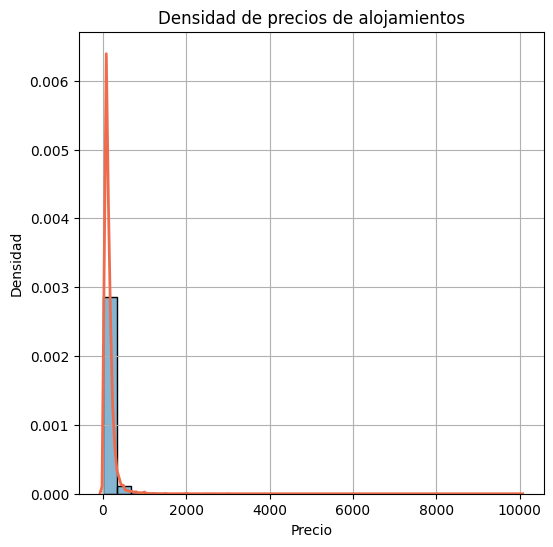

In [9]:
### DENSIDAD DE PRECIOS DE ALOJAMIENTOS
plt.figure(figsize=(6, 6))
sns.histplot(base_airbnb_limpia['price'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_airbnb_limpia['price'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de precios de alojamientos')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid()
plt.show()

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  120.762215
1                Bronx     Private room   57.135755
2                Bronx      Shared room   56.930233
3             Brooklyn  Entire home/apt  171.282177
4             Brooklyn     Private room   73.345480
5             Brooklyn      Shared room   45.458621
6            Manhattan  Entire home/apt  230.212371
7            Manhattan     Private room  106.600762
8            Manhattan      Shared room   77.980337
9               Queens  Entire home/apt  139.225603
10              Queens     Private room   69.307807
11              Queens      Shared room   64.467105
12       Staten Island  Entire home/apt  125.366667
13       Staten Island     Private room   57.584906
14       Staten Island      Shared room   57.600000


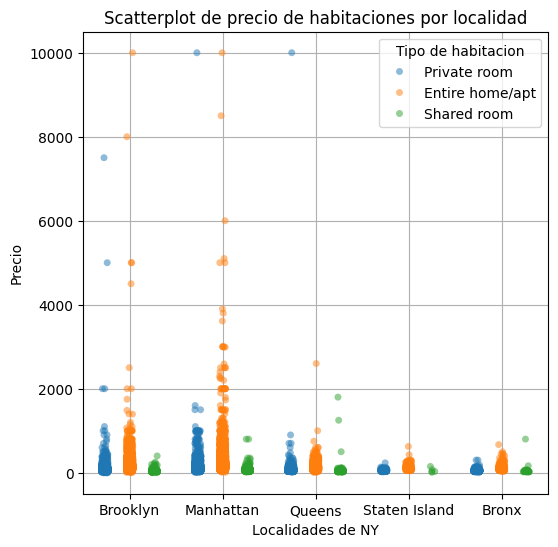

In [10]:
# DISTRIBUCION PRECIO POR TIPO DE HABITACION POR LOCALIDAD
means_precio_hab_loc = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
print(means_precio_hab_loc)

plt.figure(figsize=(6, 6))
sns.stripplot(data = base_airbnb_limpia, x = "neighbourhood_group", y = "price", hue = "room_type", dodge = True, alpha = 0.5)
plt.title("Scatterplot de precio de habitaciones por localidad")
plt.xlabel("Localidades de NY")
plt.ylabel("Precio")
plt.legend(title = "Tipo de habitacion")
plt.grid()
plt.show()

In [11]:
# OUTLIERS DE PRECIO POR TIPO DE HABITACION POR LOCALIDAD
Q1_1 = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['price'].quantile(0.05)
Q3_1 = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['price'].quantile(0.95)
IQR_1 = Q3_1 - Q1_1
lower_precio_hab_loc = Q1_1 - 1.5 * IQR_1
upper_precio_hab_loc = Q3_1 + 1.5 * IQR_1

# Crear un DataFrame con los límites de los cuantiles
limits_precio_hab_loc = pd.DataFrame({'lower_precio_hab_loc': lower_precio_hab_loc, 'upper_precio_hab_loc': upper_precio_hab_loc}).reset_index()
# Unir los límites al DataFrame original en los localidad
base_airbnb_limpia = pd.merge(base_airbnb_limpia, limits_precio_hab_loc, on = ['neighbourhood_group', 'room_type'])

# me quedo solo con los datos uqe son mayor o igual a "lower" y menor o igual a "upper"
base_airbnb_limpia = base_airbnb_limpia[
    (base_airbnb_limpia['price'] >= base_airbnb_limpia['lower_precio_hab_loc']) & 
    (base_airbnb_limpia['price'] <= base_airbnb_limpia['upper_precio_hab_loc'])]

print(base_airbnb_limpia)

      neighbourhood_group     neighbourhood  latitude  longitude  \
0                Brooklyn        Kensington  40.64749  -73.97237   
1               Manhattan           Midtown  40.75362  -73.98377   
2                Brooklyn      Clinton Hill  40.68514  -73.95976   
3               Manhattan       East Harlem  40.79851  -73.94399   
4               Manhattan       Murray Hill  40.74767  -73.97500   
...                   ...               ...       ...        ...   
38803            Brooklyn  Brooklyn Heights  40.69827  -73.99649   
38804           Manhattan   Upper East Side  40.78099  -73.95366   
38805              Queens          Flushing  40.75104  -73.81459   
38807               Bronx        Mott Haven  40.80787  -73.92400   
38808            Brooklyn          Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt 

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  118.967320
1                Bronx     Private room   56.203455
2                Bronx      Shared room   36.170732
3             Brooklyn  Entire home/apt  162.682121
4             Brooklyn     Private room   68.853794
5             Brooklyn      Shared room   42.885017
6            Manhattan  Entire home/apt  216.159491
7            Manhattan     Private room   99.120538
8            Manhattan      Shared room   72.332386
9               Queens  Entire home/apt  136.964347
10              Queens     Private room   63.053484
11              Queens      Shared room   41.939597
12       Staten Island  Entire home/apt  122.013423
13       Staten Island     Private room   56.462025
14       Staten Island      Shared room   57.600000


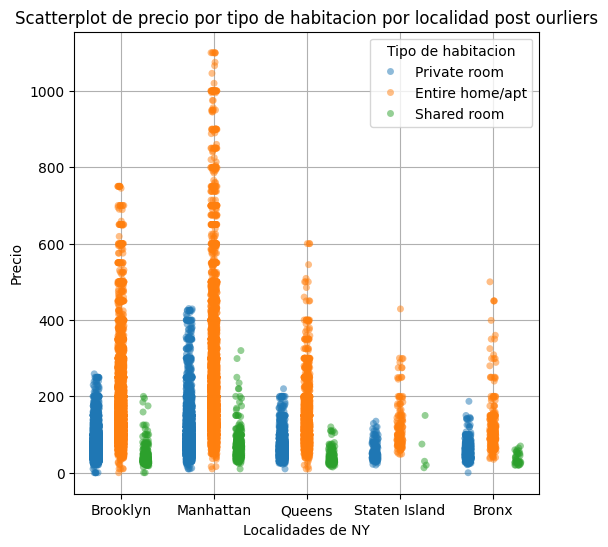

In [12]:
# DISTRIBUCIÓN PRECIO POR HABITACION POR LOCALIDAD POST OUTLIERS
means_precio_hab_loc_out = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
print(means_precio_hab_loc_out)

plt.figure(figsize=(6, 6))
sns.stripplot(data = base_airbnb_limpia, x = "neighbourhood_group", y = "price", hue = "room_type", dodge = True, alpha = 0.5)
plt.title("Scatterplot de precio por tipo de habitacion por localidad post ourliers") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Precio")
plt.legend(title = "Tipo de habitacion")
plt.grid()
plt. show()

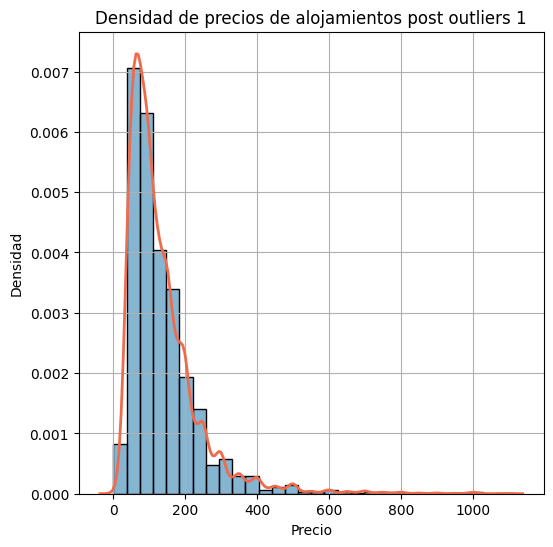

In [13]:
# DENSIDAD DE PRECIOS DE ALOJAMIENTOS POST OUTLIERS
plt.figure(figsize=(6, 6))
sns.histplot(base_airbnb_limpia['price'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_airbnb_limpia['price'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de precios de alojamientos post outliers 1')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid()
plt.show()

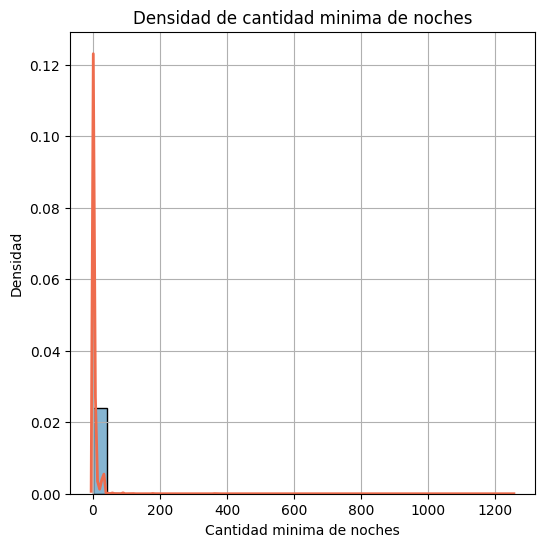

In [14]:
### DENSIDAD DE CANTIDAD MINIMA DE NOCHES
plt.figure(figsize=(6, 6))
sns.histplot(base_airbnb_limpia['minimum_nights'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_airbnb_limpia['minimum_nights'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de cantidad minima de noches')
plt.xlabel('Cantidad minima de noches')
plt.ylabel('Densidad')
plt.grid()
plt.show()

   neighbourhood_group        room_type  minimum_nights
0                Bronx  Entire home/apt        5.669935
1                Bronx     Private room        3.084453
2                Bronx      Shared room        2.097561
3             Brooklyn  Entire home/apt        5.924538
4             Brooklyn     Private room        4.641291
5             Brooklyn      Shared room        6.271777
6            Manhattan  Entire home/apt        8.598848
7            Manhattan     Private room        4.677125
8            Manhattan      Shared room        3.284091
9               Queens  Entire home/apt        4.372053
10              Queens     Private room        4.119397
11              Queens      Shared room        4.127517
12       Staten Island  Entire home/apt        3.872483
13       Staten Island     Private room        3.031646
14       Staten Island      Shared room        2.600000


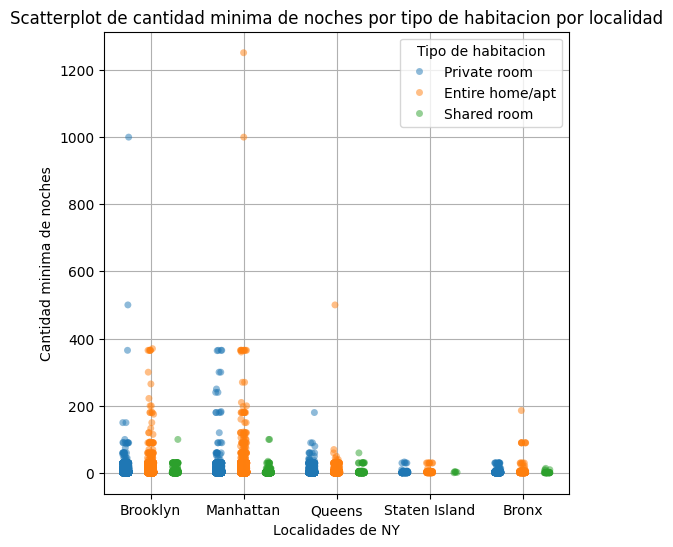

In [15]:
# DISTRIBUCIÓN DE CANTIDAD MINIMA DE NOCHES POR TIPO DE HABITACION POR LOCALIDAD
means_min_hab_loc = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].mean().reset_index()
print(means_min_hab_loc)

plt.figure(figsize=(6, 6))
sns.stripplot(data = base_airbnb_limpia, x = "neighbourhood_group", y = "minimum_nights", hue = "room_type", dodge = True, alpha = 0.5)
plt.title("Scatterplot de cantidad minima de noches por tipo de habitacion por localidad")
plt.xlabel("Localidades de NY")
plt.ylabel("Cantidad minima de noches")
plt.legend(title = "Tipo de habitacion")
plt.grid()
plt.show()

In [78]:
# OUTLIERS DE CANTIDAD MINIMA DE NOCHES POR TIPO DE HABITACION POR LOCALIDAD
Q1_2 = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].quantile(0.05)
Q3_2 = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2
lower_min_hab_loc = Q1_2 - 1.5 * IQR_2
upper_min_hab_loc = Q3_2 + 1.5 * IQR_2

# Crear un DataFrame con los límites de los cuantiles
limits_min_hab_loc = pd.DataFrame({'lower_min_hab_loc': lower_min_hab_loc, 'upper_min_hab_loc': upper_min_hab_loc}).reset_index()
# Unir los límites al DataFrame original en los localidad
base_airbnb_limpia = pd.merge(base_airbnb_limpia, limits_min_hab_loc, on = ['neighbourhood_group', 'room_type'])

# me quedo solo con los datos uqe son mayor o igual a "lower" y menor o igual a "upper"
base_airbnb_limpia = base_airbnb_limpia[
    (base_airbnb_limpia['minimum_nights'] >= base_airbnb_limpia['lower_min_hab_loc']) & 
    (base_airbnb_limpia['minimum_nights'] <= base_airbnb_limpia['upper_min_hab_loc'])]

print(base_airbnb_limpia)

KeyError: 'lower_min_hab_loc'

   neighbourhood_group        room_type  minimum_nights
0                Bronx  Entire home/apt        3.083893
1                Bronx     Private room        2.255952
2                Bronx      Shared room        2.097561
3             Brooklyn  Entire home/apt        5.174635
4             Brooklyn     Private room        4.187405
5             Brooklyn      Shared room        5.944056
6            Manhattan  Entire home/apt        7.305507
7            Manhattan     Private room        3.934545
8            Manhattan      Shared room        2.638968
9               Queens  Entire home/apt        3.966551
10              Queens     Private room        3.959638
11              Queens      Shared room        4.127517
12       Staten Island  Entire home/apt        2.584507
13       Staten Island     Private room        2.130719
14       Staten Island      Shared room        2.600000


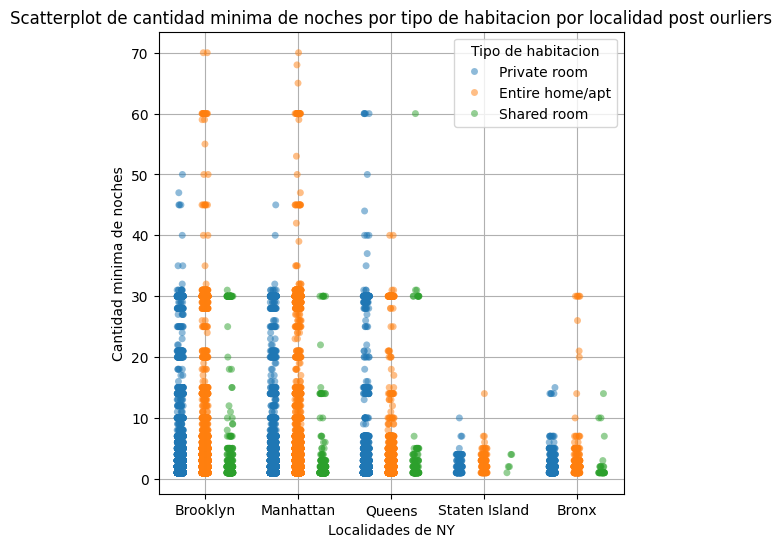

In [17]:
# DISTRIBUCIÓN CANTIDAD MINIMA DE NOCHES POR TIPO DE HABITACION POR LOCALIDAD POST OUTLIERS
means_min_hab_loc_out = base_airbnb_limpia.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].mean().reset_index()
print(means_min_hab_loc_out)

plt.figure(figsize=(6, 6))
sns.stripplot(data = base_airbnb_limpia, x = "neighbourhood_group", y = "minimum_nights", hue = "room_type", dodge = True, alpha = 0.5)
plt.title("Scatterplot de cantidad minima de noches por tipo de habitacion por localidad post ourliers") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Cantidad minima de noches")
plt.legend(title = "Tipo de habitacion")
plt.grid()
plt. show()

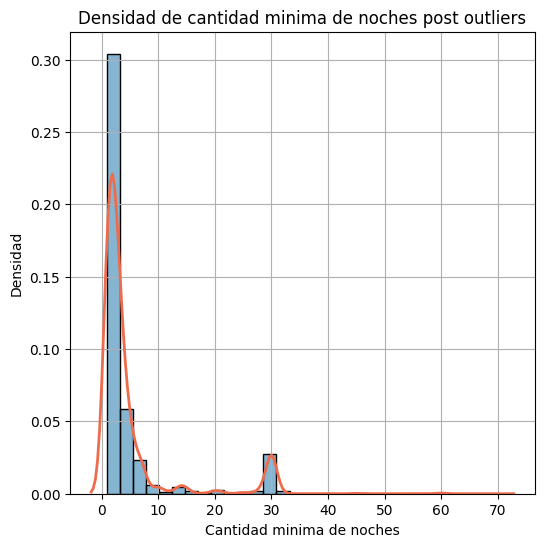

In [18]:
# DENSIDAD CANTIDAD MINIMA DE NOCHES POST OUTLIERS
plt.figure(figsize=(6, 6))
sns.histplot(base_airbnb_limpia['minimum_nights'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_airbnb_limpia['minimum_nights'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de cantidad minima de noches post outliers')
plt.xlabel('Cantidad minima de noches')
plt.ylabel('Densidad')
plt.grid()
plt.show()

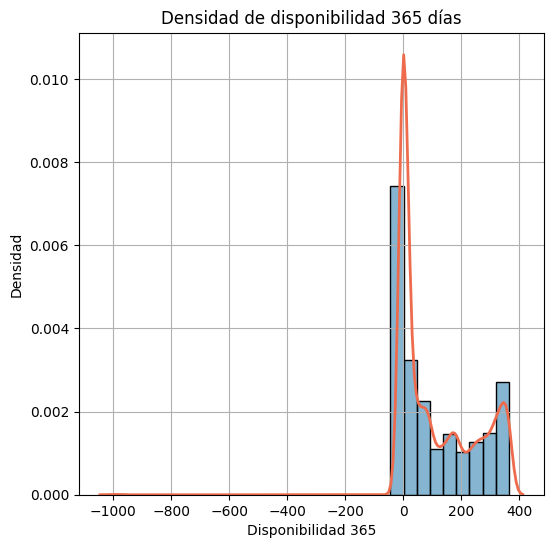

In [19]:
### DENSIDAD DE DISPONIBILIDAD 365 (El número de días al año que el anuncio está disponible para reservar.)
plt.figure(figsize=(6, 6))
sns.histplot(base_airbnb_limpia['availability_365'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_airbnb_limpia['availability_365'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de disponibilidad 365 días')
plt.xlabel('Disponibilidad 365')
plt.ylabel('Densidad')
plt.grid()
plt.show()

  neighbourhood_group  availability_365
0               Bronx        167.534994
1            Brooklyn        105.020408
2           Manhattan        107.805308
3              Queens        149.303926
4       Staten Island        205.710000


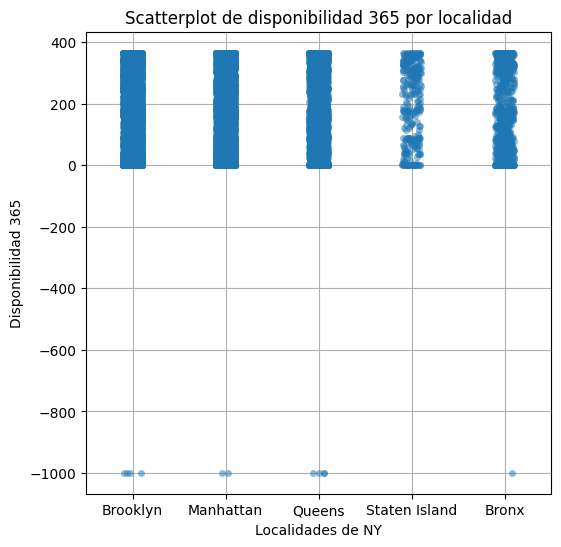

In [20]:
# DISTRIBUCIÓN DE DISPONIBILIDAD 365 POR LOCALIDAD
means_min_hab_loc = base_airbnb_limpia.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
print(means_min_hab_loc)

plt.figure(figsize=(6, 6))
sns.stripplot(data = base_airbnb_limpia, x = "neighbourhood_group", y = "availability_365", dodge = True, alpha = 0.5)
plt.title("Scatterplot de disponibilidad 365 por localidad")
plt.xlabel("Localidades de NY")
plt.ylabel("Disponibilidad 365")
plt.grid()
plt.show()

In [21]:
# OUTLIERS DISPONIBILIDAD POR LOCALIDAD
Q1_3 = base_airbnb_limpia.groupby('neighbourhood_group')['availability_365'].quantile(0.05)
Q3_3 = base_airbnb_limpia.groupby('neighbourhood_group')['availability_365'].quantile(0.95)
IQR_3 = Q3_3 - Q1_3
lower_disp_loc = Q1_3 - 1.5 * IQR_3
upper_disp_loc = Q3_3 + 1.5 * IQR_3

# Crear un DataFrame con los límites de los cuantiles
limits_disp_loc = pd.DataFrame({'lower_disp_loc': lower_disp_loc, 'upper_disp_loc': upper_disp_loc}).reset_index()
# Unir los límites al DataFrame original en los localidad
base_airbnb_limpia = pd.merge(base_airbnb_limpia, limits_disp_loc, on = ['neighbourhood_group'])

# me quedo solo con los datos uqe son mayor o igual a "lower" y menor o igual a "upper"
base_airbnb_limpia = base_airbnb_limpia[
    (base_airbnb_limpia['availability_365'] >= base_airbnb_limpia['lower_disp_loc']) & 
    (base_airbnb_limpia['availability_365'] <= base_airbnb_limpia['upper_disp_loc'])]

print(base_airbnb_limpia)

      neighbourhood_group     neighbourhood  latitude  longitude  \
0                Brooklyn        Kensington  40.64749  -73.97237   
1               Manhattan           Midtown  40.75362  -73.98377   
2                Brooklyn      Clinton Hill  40.68514  -73.95976   
3               Manhattan       East Harlem  40.79851  -73.94399   
4               Manhattan       Murray Hill  40.74767  -73.97500   
...                   ...               ...       ...        ...   
38330            Brooklyn  Brooklyn Heights  40.69827  -73.99649   
38331           Manhattan   Upper East Side  40.78099  -73.95366   
38332              Queens          Flushing  40.75104  -73.81459   
38333               Bronx        Mott Haven  40.80787  -73.92400   
38334            Brooklyn          Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt 

  neighbourhood_group  availability_365
0               Bronx        168.920428
1            Brooklyn        105.291933
2           Manhattan        107.940383
3              Queens        150.317881
4       Staten Island        205.710000


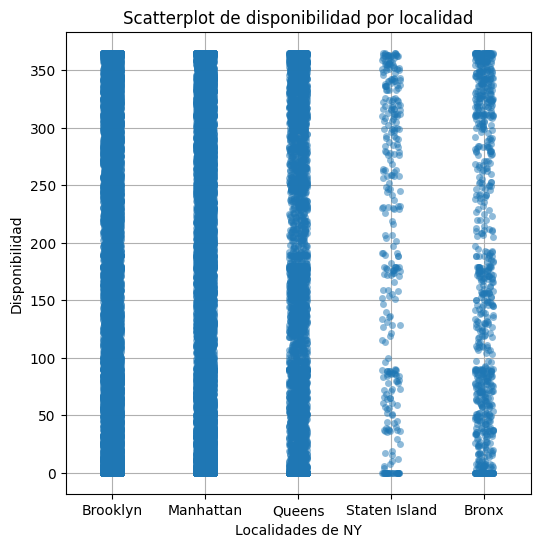

In [106]:
# DISTRIBUCIÓN DISPONIBILIDAD POR LOCALIDAD POST OUTLIERS
means_disp_loc_out = base_airbnb_limpia.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
print(means_disp_loc_out)

plt.figure(figsize=(6, 6))
sns.stripplot(data = base_airbnb_limpia, x = "neighbourhood_group", y = "availability_365", dodge = True, alpha = 0.5)
plt.title("Scatterplot de disponibilidad por localidad") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Disponibilidad")
plt.grid()
plt. show()

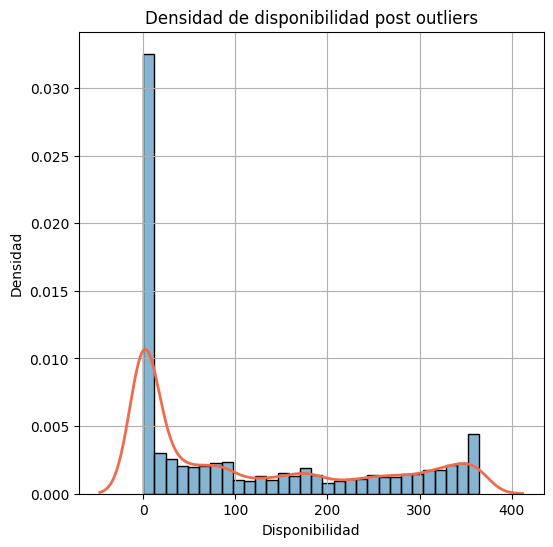

In [23]:
# DENSIDAD DISPONIBILIDAD POST OUTLIERS
plt.figure(figsize=(6, 6))
sns.histplot(base_airbnb_limpia['availability_365'], bins = 30, color = '#3685B5', kde = False, stat = "density", alpha = 0.6)
sns.kdeplot(base_airbnb_limpia['availability_365'], color = '#EE6C4D', linewidth = 2)
plt.title('Densidad de disponibilidad post outliers')
plt.xlabel('Disponibilidad')
plt.ylabel('Densidad')
plt.grid()
plt.show()

In [80]:
print(f"Número de filas antes de eliminar outliers: {base_airbnb_original.shape[0]}")
print(f"Número de filas después de eliminar outliers: {base_airbnb_limpia.shape[0]}")
print(f"Número de outliers:")
print(base_airbnb_original.shape[0]-base_airbnb_limpia.shape[0])

Número de filas antes de eliminar outliers: 48905
Número de filas después de eliminar outliers: 38324
Número de outliers:
10581


In [25]:
# VARIABLES CATEGORICAS A DUMMIES
# Para transformar las variables categoricas neighbourhood_group y room_type en variables numericas aplico One-Hot Encoding 

# Separa las categorias de la variable en distintas columnas y le pone valor True si cumple la categoria o False si no
dummies = pd.get_dummies(base_airbnb_limpia[['neighbourhood_group', 'room_type']], drop_first = False)

# Concateno las variables transformadas a la base limpia
base_airbnb_transformadas = pd.concat([base_airbnb_limpia, dummies], axis = 1)

# Columnas a las que me interesa cambiarle los valores de True/False a 0 y 1
columnas = [
    'neighbourhood_group_Brooklyn', 
    'neighbourhood_group_Manhattan', 
    'neighbourhood_group_Queens', 
    'neighbourhood_group_Staten Island', 
    'neighbourhood_group_Bronx',
    'room_type_Private room', 
    'room_type_Shared room',
    'room_type_Entire home/apt']

# Le cambio el valor de True/False en 0 y 1
for col in columnas:
    if col in base_airbnb_transformadas.columns:
        base_airbnb_transformadas[col] = base_airbnb_transformadas[col].astype(int)

# Verificar las columnas finales
print(base_airbnb_transformadas.columns)

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'lower_precio_hab_loc', 'upper_precio_hab_loc',
       'lower_min_hab_loc', 'upper_min_hab_loc', 'lower_disp_loc',
       'upper_disp_loc', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


In [26]:
#Creo la nueva variable que cuenta la cantidiad de oferta por localidad
oferta = base_airbnb_transformadas.groupby('neighbourhood_group').size().reset_index(name = 'offer group')
base_airbnb_final = base_airbnb_transformadas.merge(oferta, on ='neighbourhood_group', how = 'left')
print(base_airbnb_final)

      neighbourhood_group     neighbourhood  latitude  longitude  \
0                Brooklyn        Kensington  40.64749  -73.97237   
1               Manhattan           Midtown  40.75362  -73.98377   
2                Brooklyn      Clinton Hill  40.68514  -73.95976   
3               Manhattan       East Harlem  40.79851  -73.94399   
4               Manhattan       Murray Hill  40.74767  -73.97500   
...                   ...               ...       ...        ...   
38319            Brooklyn  Brooklyn Heights  40.69827  -73.99649   
38320           Manhattan   Upper East Side  40.78099  -73.95366   
38321              Queens          Flushing  40.75104  -73.81459   
38322               Bronx        Mott Haven  40.80787  -73.92400   
38323            Brooklyn          Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt 

In [27]:
base_airbnb_final.columns # ESTAMOS BIEN ;) NO SE REPITE NINGUNA

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'lower_precio_hab_loc', 'upper_precio_hab_loc',
       'lower_min_hab_loc', 'upper_min_hab_loc', 'lower_disp_loc',
       'upper_disp_loc', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'offer group'],
      dtype='object')

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [28]:
# Lista de variables para al correlacion
variables_corr =  ['latitude', 'longitude', 'price', 'minimum_nights', 
                   'number_of_reviews', 'reviews_per_month', 
                   'calculated_host_listings_count', 'availability_365',
                   'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 
                   'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 
                   'room_type_Private room', 'room_type_Shared room']

# Creo un nuevo DataFrame con columnas únicas (.loc[:, eso puse para que no me duplique las columnas)
base_airbnb_corr = base_airbnb_final.loc[:, variables_corr]

# Matriz de correlación
matriz_corr = base_airbnb_corr.corr()

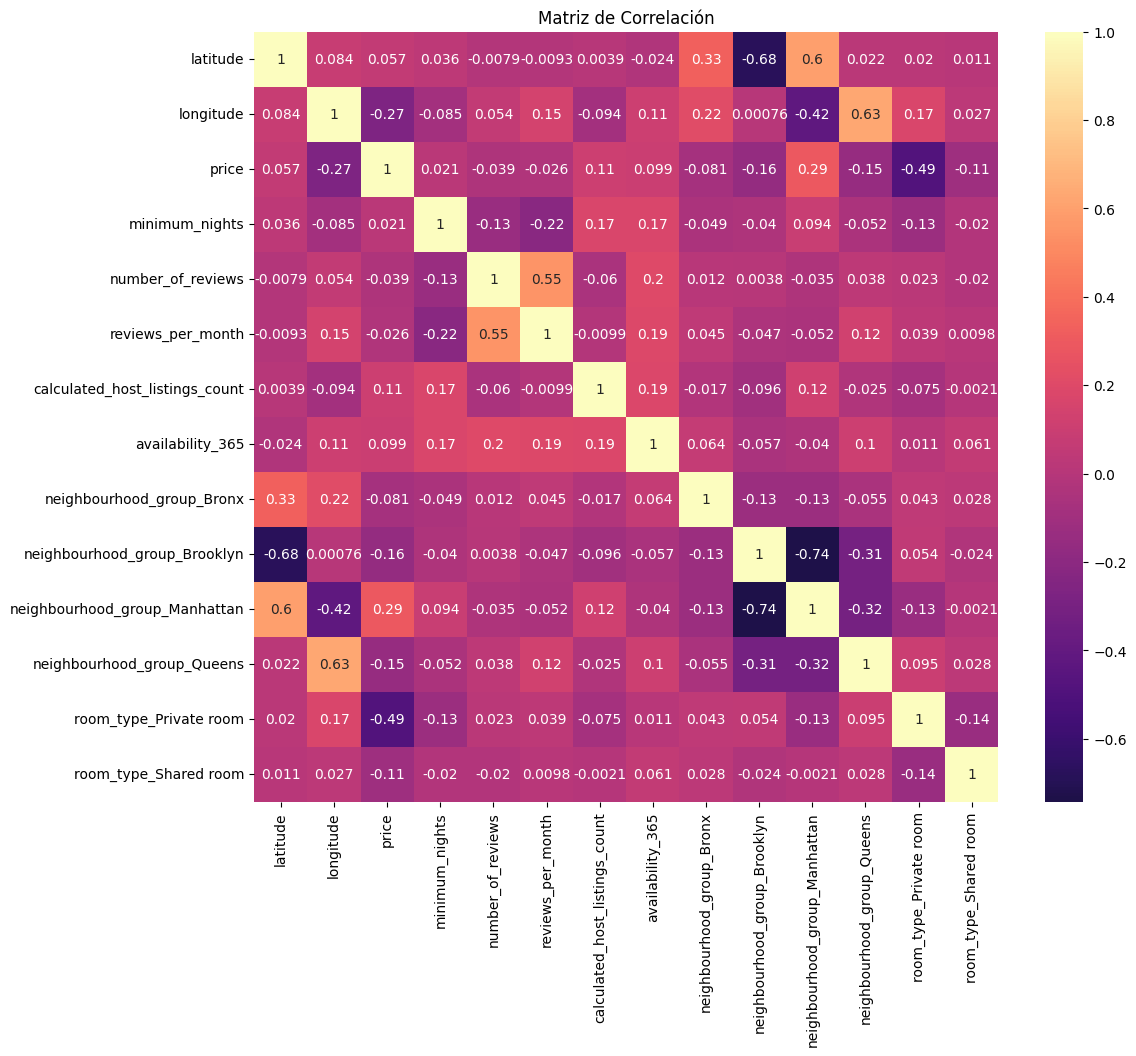

In [63]:
#Grafico la matriz de correlacion, no se si esta bien esto porque no me aparece ningun link ahi arriba pero bueno mientras tanto es algo
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap='magma', center=0)
plt.title('Matriz de Correlación')
plt.show()

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [83]:
# Resolver acá
proporcion_neighbourhood = (base_airbnb_final['neighbourhood_group'].value_counts(normalize=True) * 100).apply(lambda x: int(x * 100) / 100)
proporcion_room_type = (base_airbnb_final['room_type'].value_counts(normalize=True) * 100).apply(lambda x: int(x * 100) / 100)

print("Proporción de oferentes por 'Neighbourhood group':")
print(proporcion_neighbourhood)
print("\nProporción de oferentes por 'Tipo de habitación':")
print(proporcion_room_type)

Proporción de oferentes por 'Neighbourhood group':
neighbourhood_group
Manhattan        42.76
Brooklyn         42.43
Queens           11.82
Bronx             2.19
Staten Island     0.78
Name: proportion, dtype: float64

Proporción de oferentes por 'Tipo de habitación':
room_type
Entire home/apt    52.36
Private room       45.47
Shared room         2.16
Name: proportion, dtype: float64


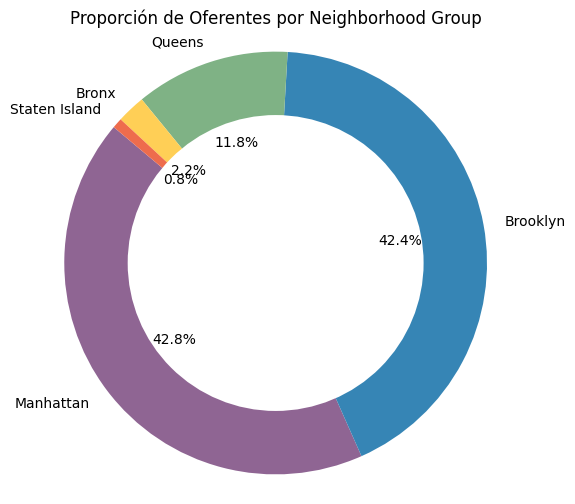

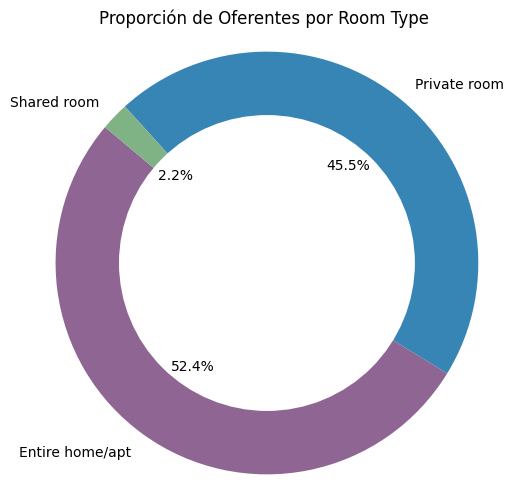

In [105]:
paleta2 = ['#ff0080', '#b81466', '#a6326c', '#ec53a0','#51182c']
paleta = ['#8F6593', '#3685B5', '#7FB285', '#FFCF56', '#EE6C4D']
#Opcion donas
#localidad
plt.figure(figsize = (6, 6))
plt.pie(proporcion_neighbourhood, labels=proporcion_neighbourhood.index, autopct='%1.1f%%', startangle=140, colors=paleta)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proporción de Oferentes por Neighborhood Group')
plt.axis('equal')
plt.show()

#Tipo de cuarto
plt.figure(figsize=(6, 6))
plt.pie(proporcion_room_type, labels=proporcion_room_type.index, autopct='%1.1f%%', startangle=140, colors=paleta)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proporción de Oferentes por Room Type ')
plt.axis('equal')
plt.show()

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_13869/3588796549.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=base_airbnb_final, x='neighbourhood_group', hue='room_type', palette=paleta)


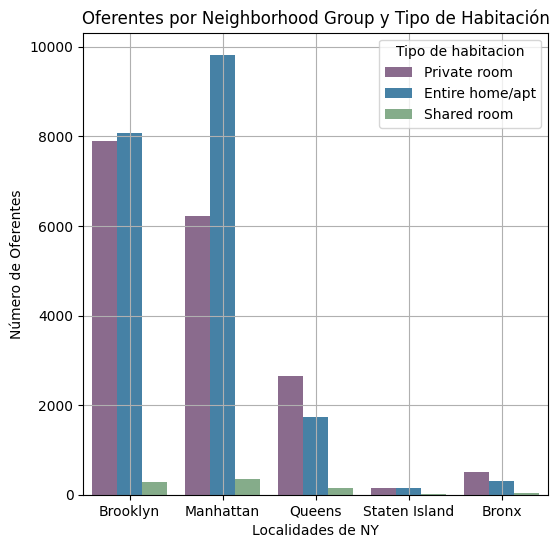

In [32]:
#Aca se ven dividio por localidad las proporciones de cada tipo de cuarto 
plt.figure(figsize=(6, 6))
sns.countplot(data=base_airbnb_final, x='neighbourhood_group', hue='room_type', palette=paleta)
plt.title('Oferentes por Neighborhood Group y Tipo de Habitación')
plt.xlabel('Localidades de NY')
plt.ylabel('Número de Oferentes')
plt.legend(title = "Tipo de habitacion")
plt.grid()
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 


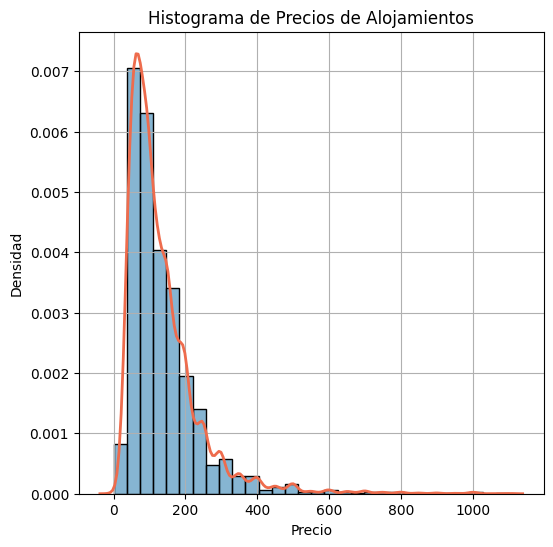

In [33]:
# Resolver acá
plt.figure(figsize=(6, 6))
sns.histplot(base_airbnb_final['price'], bins=30, color='#3685B5', kde=False, stat="density", alpha=0.6)
sns.kdeplot(base_airbnb_final['price'], color='#EE6C4D', linewidth=2)
plt.title('Histograma de Precios de Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid()
plt.show()

In [34]:
#Supongo que el precio minimo se va a ir cuando la base de datos este limpia del todo pero me parece raro que haya uno que salga 0 hay que revisar si no se va, me parece raro que el maximos ea 321 tmb 
precio_min = base_airbnb_final['price'].min()
precio_max = base_airbnb_final['price'].max()
precio_prom = base_airbnb_final['price'].mean()
print('Precio Mínimo: ' + str(precio_min))
print('Precio Máximo: ' + str(precio_max))
print(f'Precio Promedio: {precio_prom:.2f}')

Precio Mínimo: 0.0
Precio Máximo: 1100.0
Precio Promedio: 134.18


In [35]:
# Media por neighborhood_group
media_neighbourhood = base_airbnb_final.groupby('neighbourhood_group')['price'].mean()

# Media por room_type
media_room_type = base_airbnb_final.groupby('room_type')['price'].mean()

print('Media de Precio por Neighborhood Group:')
print(media_neighbourhood)

print('\nMedia de Precio por Tipo de Habitación:')
print(media_room_type)

Media de Precio por Neighborhood Group:
neighbourhood_group
Bronx             78.057007
Brooklyn         115.002582
Manhattan        168.966927
Queens            90.707726
Staten Island     87.633333
Name: price, dtype: float64

Media de Precio por Tipo de Habitación:
room_type
Entire home/apt    185.981263
Private room        78.309405
Shared room         54.901205
Name: price, dtype: float64


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

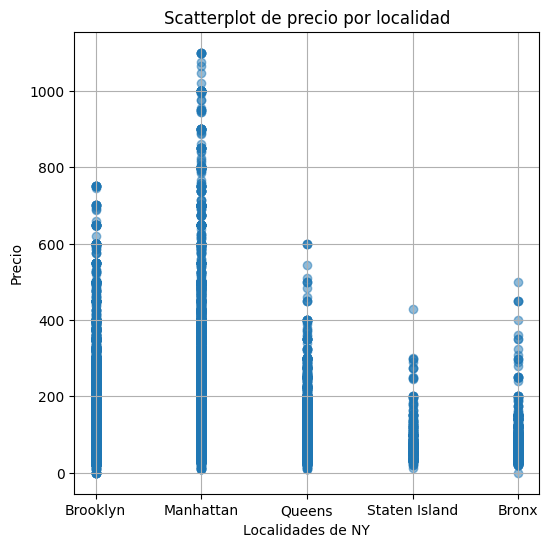

In [67]:
# Resolver acá
#SCATTERPLOT PRECIO POR LOCALIDAD
plt.figure(figsize=(6, 6))
plt.scatter (x = base_airbnb_final['neighbourhood_group'], y = base_airbnb_final["price"], alpha = 0.5)
plt.title("Scatterplot de precio por localidad") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Precio")
plt.grid()
plt. show()

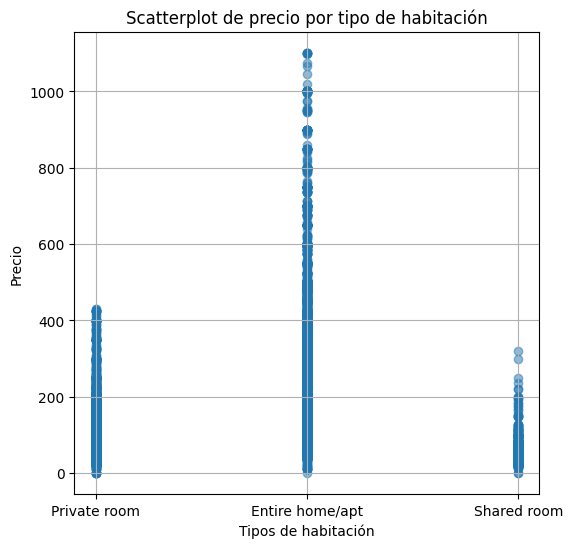

In [69]:
#SCATTERPLOT PRECIO POR TIPO DE HABITACIÓN
plt.figure(figsize=(6,6))
plt.scatter (x = base_airbnb_final["room_type"],y = base_airbnb_final['price'], alpha = 0.5)
plt.title("Scatterplot de precio por tipo de habitación") 
plt.xlabel ("Tipos de habitación")
plt.ylabel ("Precio")
plt.grid()
plt. show()

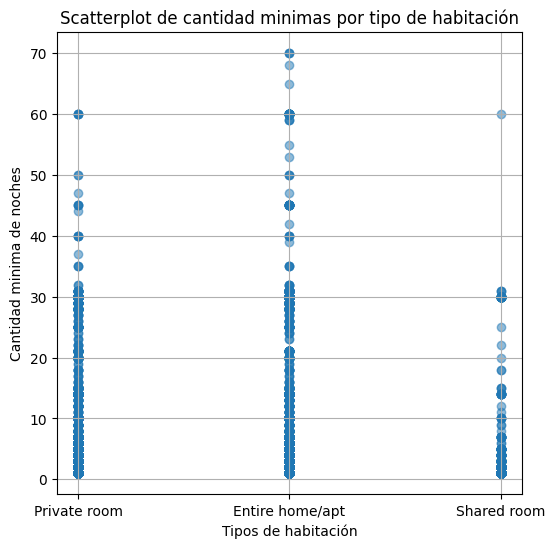

In [38]:
#SCATTERPLOT TIPO DE HABITACION POR MINIMO DE NOCHES
plt.figure(figsize=(6, 6))
plt.scatter (x = base_airbnb_final['room_type'], y = base_airbnb_final["minimum_nights"], alpha = 0.5)
plt.title("Scatterplot de cantidad minimas por tipo de habitación") 
plt.xlabel ("Tipos de habitación")
plt.ylabel ("Cantidad minima de noches")
plt.grid()
plt. show()

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [39]:
# Resolver acá
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [40]:
base_airbnb_final.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'lower_precio_hab_loc', 'upper_precio_hab_loc',
       'lower_min_hab_loc', 'upper_min_hab_loc', 'lower_disp_loc',
       'upper_disp_loc', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'offer group'],
      dtype='object')

In [85]:
# Me quedo solo con las columnas de las variables numericas
variables_pca = ['latitude', 'longitude', 'price', 'minimum_nights', 
                 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365', 'offer group','neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
                 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
                 'room_type_Entire home/apt', 'room_type_Private room',
                 'room_type_Shared room', 'offer group']

base_variables_pca = base_airbnb_final.loc[:, variables_pca]

Text(0.5, 1.0, 'Correlation matrix')

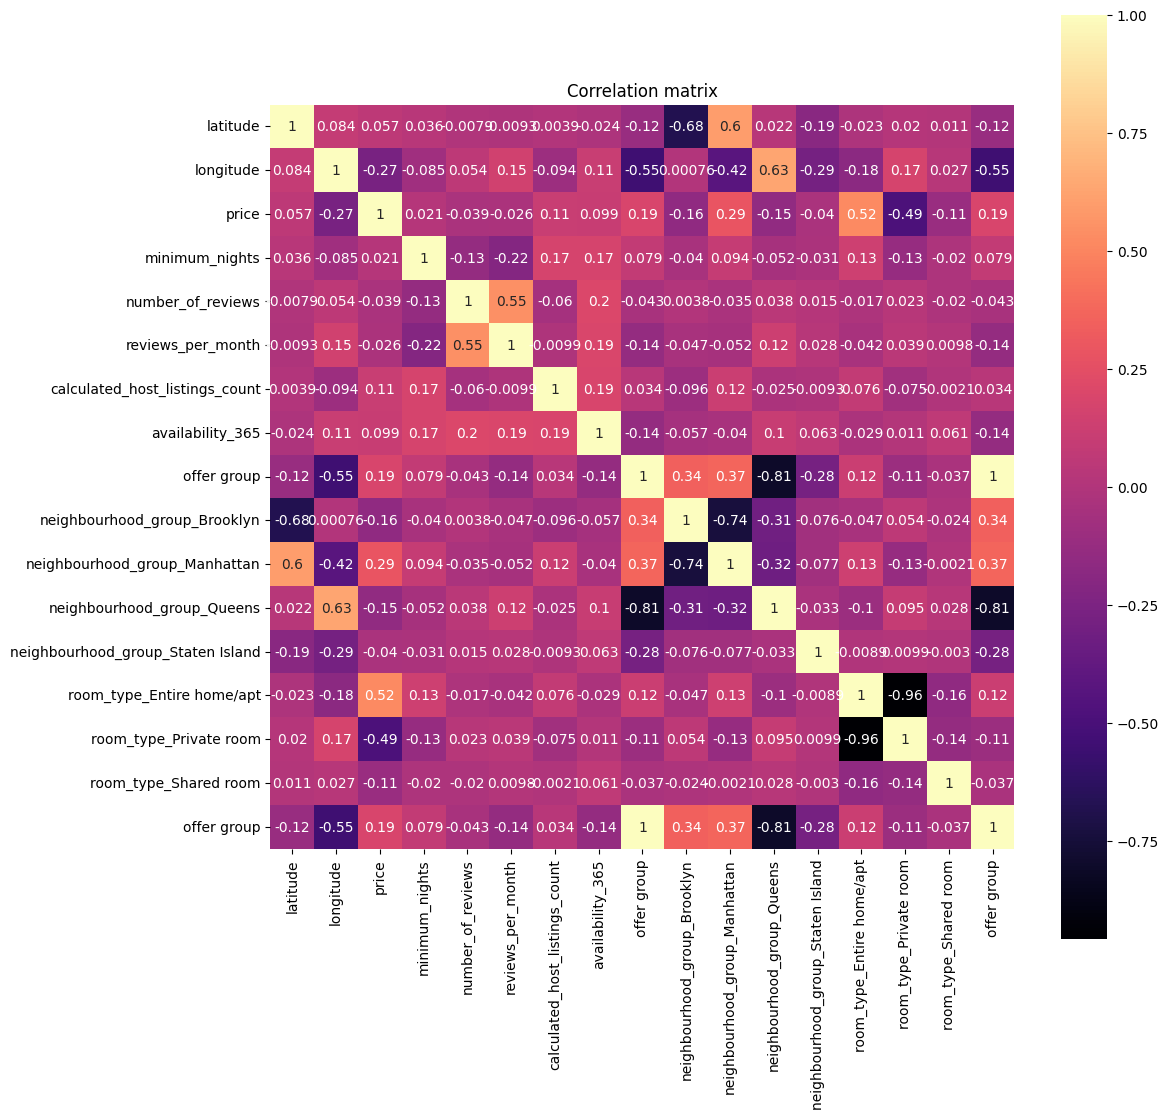

In [97]:
# vemos la matriz de correlacion
correlation = base_variables_pca.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'magma')
plt.title('Correlation matrix')

In [104]:
print(f'Media varables: {base_variables_pca.mean()}')
print(f'Desviacion varables: {base_variables_pca.std()}')

Media varables: latitude                                40.728089
longitude                              -73.951008
price                                  134.180983
minimum_nights                           5.076323
number_of_reviews                       29.449901
reviews_per_month                        1.383011
calculated_host_listings_count           5.169372
availability_365                       113.930670
offer group                          14466.237971
neighbourhood_group_Brooklyn             0.424382
neighbourhood_group_Manhattan            0.427617
neighbourhood_group_Queens               0.118203
neighbourhood_group_Staten Island        0.007828
room_type_Entire home/apt                0.523614
room_type_Private room                   0.454728
room_type_Shared room                    0.021657
offer group                          14466.237971
dtype: float64
Desviacion varables: latitude                                0.054939
longitude                               0.046629


In [86]:
# Escalamos las variables para poder ver de nuevo las correlaciones
# Inicializamos el transformador
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform al DataFrame
base_airbnb_pca_transformada = pd.DataFrame(scaler.fit_transform(base_variables_pca), columns=base_variables_pca.columns)

Text(0.5, 1.0, 'Correlation matrix escalada')

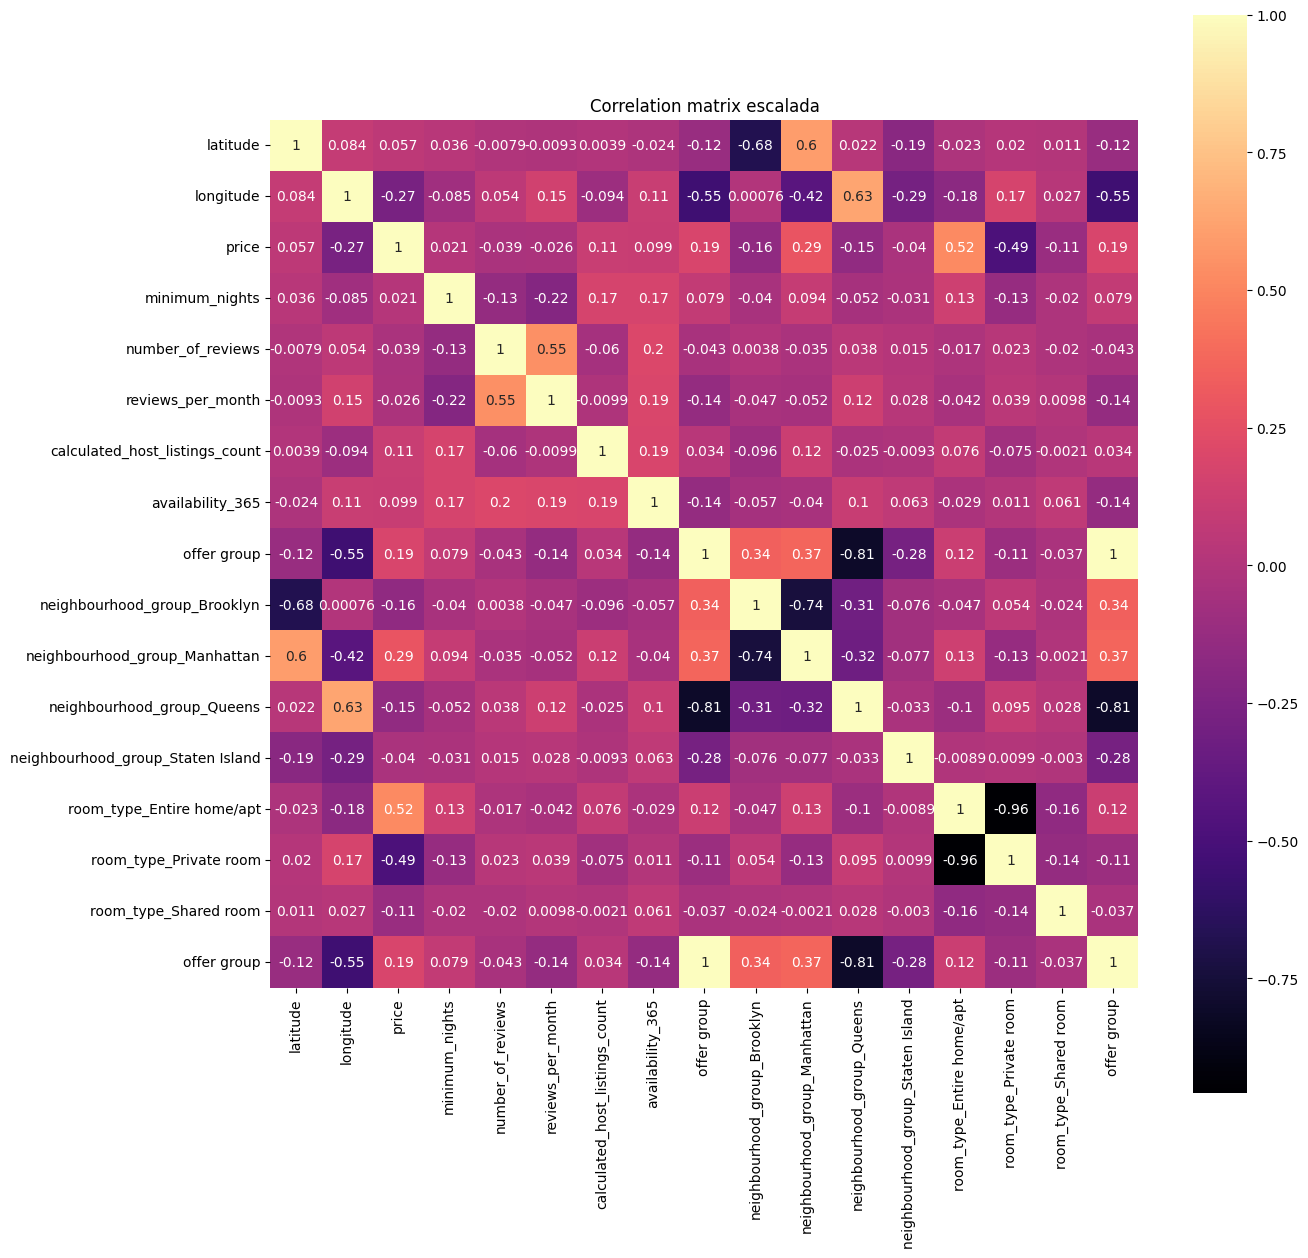

In [113]:
correlation_escalada = base_airbnb_pca_transformada.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation_escalada, vmax=1, square=True,annot=True,cmap='magma')
plt.title('Correlation matrix escalada')

In [89]:
# Ajustamos el modelo PCA
# inicio objeto PCA
pca = PCA(n_components = 2)
base_airbnb_pca = pca.fit_transform(base_airbnb_pca_transformada) # ya son los datos normalizados

In [114]:
# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)

varianza_total = sum(pca.explained_variance_ratio_)
print("Varianza total explicada:", varianza_total)

Varianza explicada: [0.2228453  0.15156551]
Varianza total explicada: 0.3744108095635755


In [116]:
# Loadings vectors
loading_pca = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)

Loadings:
 [[-0.00779398 -0.37467109  0.2230339   0.08657654 -0.07255537 -0.12568228
   0.05793205 -0.08311305  0.46025679  0.0766661   0.25922434 -0.42755573
  -0.06602698  0.21190419 -0.20247962 -0.03441754  0.46025679]
 [-0.42004755  0.00547156 -0.27765228 -0.09303876  0.00654003 -0.02147752
  -0.11967741 -0.08408901  0.18898186  0.54558388 -0.40466443 -0.16463928
  -0.01220839 -0.27852672  0.27965832 -0.00100888  0.18898186]]


In [120]:
# Definir los nombres de las variables
nombres_variables = base_airbnb_pca_transformada.columns.tolist()  # Obtener los nombres del DataFrame original

# Crear un DataFrame de loadings
loadings_df = pd.DataFrame(loading_pca, index=nombres_variables, columns=[f'PC{i+1}' for i in range(loading_pca.shape[1])])

# Imprimir los loadings
print("Loadings DataFrame:")
print(loadings_df)

Loadings DataFrame:
                                        PC1       PC2
latitude                          -0.015170 -0.674262
longitude                         -0.729259  0.008783
price                              0.434113 -0.445689
minimum_nights                     0.168512 -0.149346
number_of_reviews                 -0.141222  0.010498
reviews_per_month                 -0.244628 -0.034476
calculated_host_listings_count     0.112759 -0.192107
availability_365                  -0.161771 -0.134980
offer group                        0.895843  0.303354
neighbourhood_group_Brooklyn       0.149223  0.875774
neighbourhood_group_Manhattan      0.504554 -0.649569
neighbourhood_group_Queens        -0.832194 -0.264280
neighbourhood_group_Staten Island -0.128515 -0.019597
room_type_Entire home/apt          0.412450 -0.447092
room_type_Private room            -0.394106  0.448909
room_type_Shared room             -0.066990 -0.001619
offer group                        0.895843  0.303354


In [117]:
print(type(base_variables_pca))

<class 'pandas.core.frame.DataFrame'>


In [93]:
#Calculo los scores
scores = base_airbnb_pca 
print("Scores:\n",scores)

Scores:
 [[ 0.08444191  2.26342508]
 [ 1.47981423 -1.75532023]
 [ 0.05727642  1.13068948]
 ...
 [-5.32948726 -0.82560453]
 [-2.83393503 -2.13367487]
 [-0.35754474  2.44801622]]


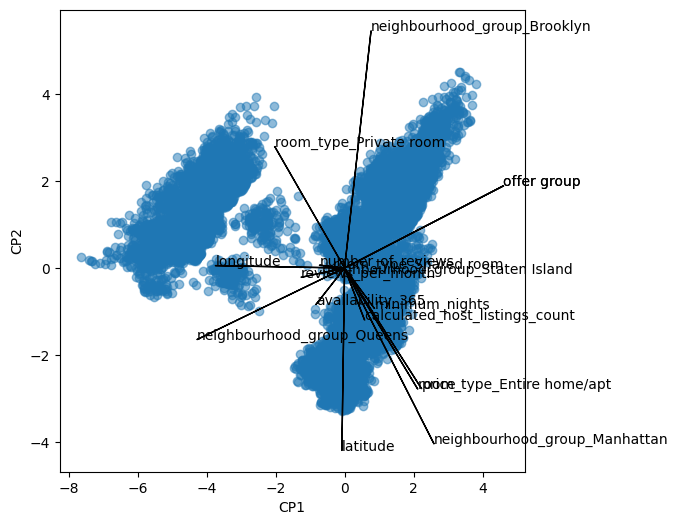

In [94]:
# Visualizamos features y loadings
i, j = 0, 1 # Componentes
scale_arrow = s_ = 10 # para extender la longitud de las flechas y que se vean mejor
scores[:,1] *= -1

fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # creamos 1 subplot
ax.scatter(scores[:,0], scores[:,1], alpha = 0.5) # graficamos los valores de los CP1 y CP2
ax.set_xlabel('CP%d' % (i+1))
ax.set_ylabel('CP%d' % (j+1))
for k in range(pca.components_.shape[1]): # loop que itera por la cantidad de features
    ax.arrow(0, 0, s_*pca.components_[i,k], s_*pca.components_[j,k]) # flecha desde el origen (0) a las coordenadas
    ax.text(s_*pca.components_[i,k], s_*pca.components_[j,k], base_variables_pca.columns[k]) # al final de cada flecha, nombre de la variable

In [51]:
print(pca.explained_variance_ratio_) # CP1 explica el 21% de la varianza

[0.21879218 0.16732131]


In [95]:
%%capture 
fig, axes = plt.subplots(1, 2, figsize=(10, 4)) # 2 subplots uno al lado del otro
ticks = np.arange(pca.n_components_)+1 # para crear ticks en el eje horizontal
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Componente principal');
ax.set_ylabel('Proporción de la varianza explicada por cada componente')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
# capture suprime la visualización de la figura parcialmente terminada

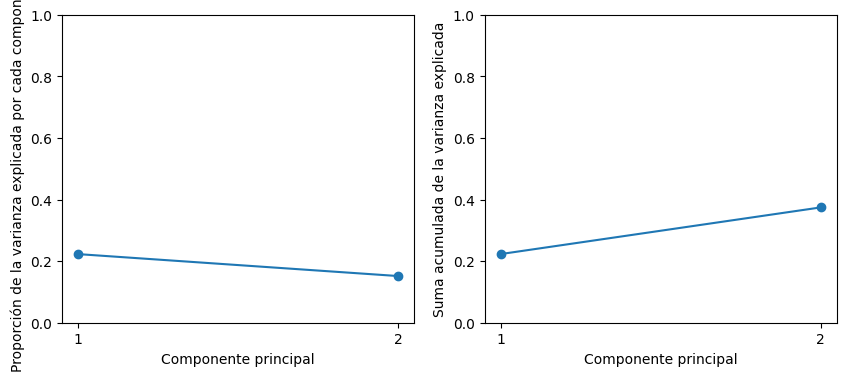

In [96]:
ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o') 
ax.set_xlabel('Componente principal')
ax.set_ylabel('Suma acumulada de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

### Parte III: Predicción


El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

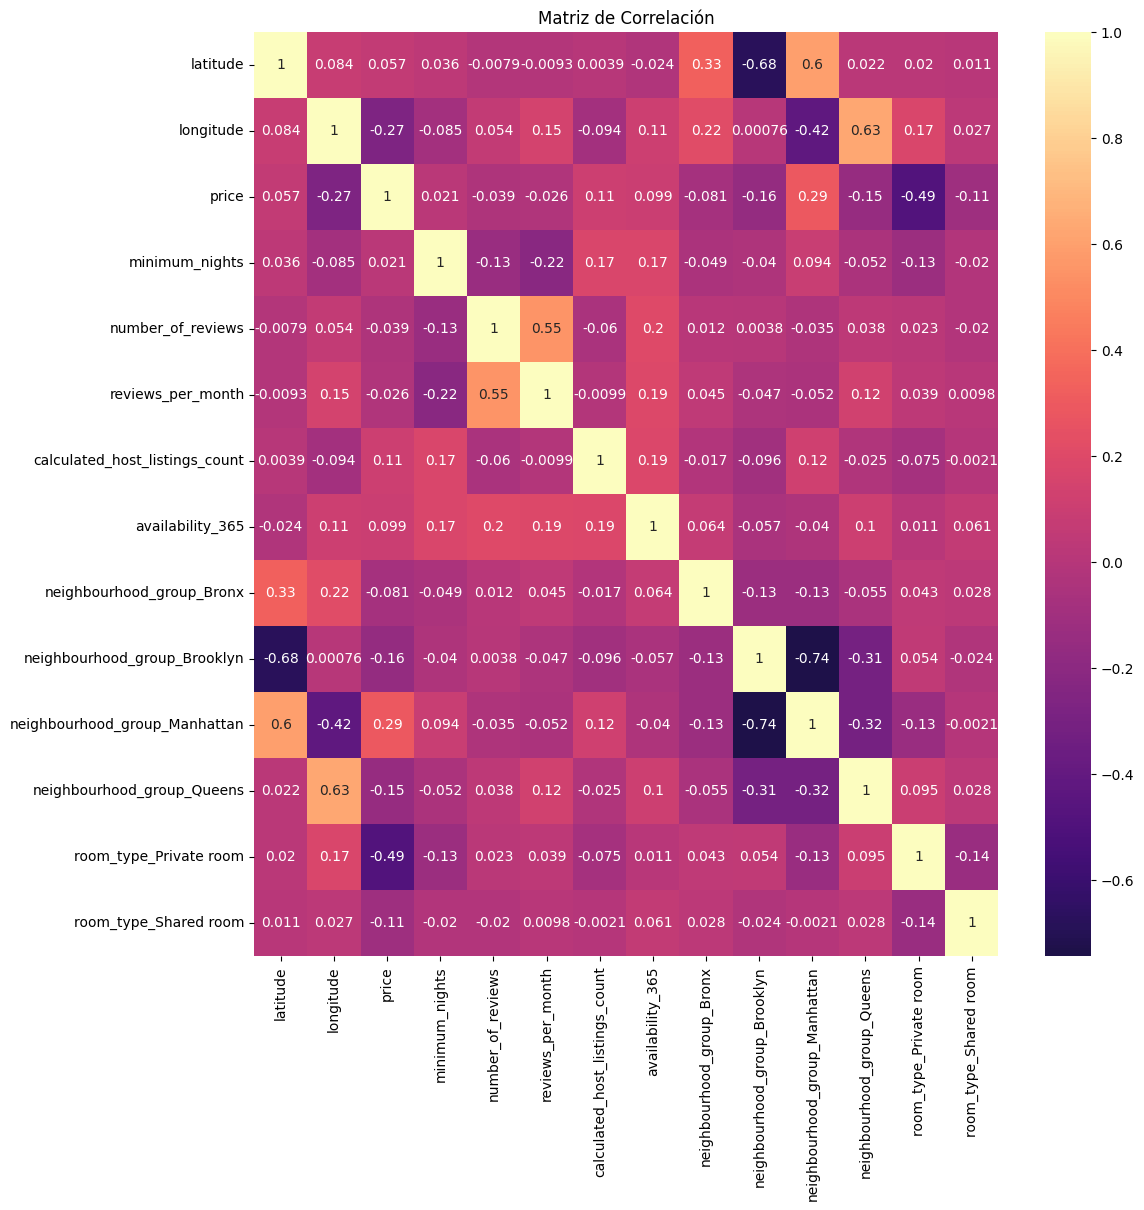

In [53]:
# Resolver acá

plt.figure(figsize=(12, 12))
sns.heatmap(matriz_corr, annot=True, cmap='magma', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [54]:
# Con la matriz de correlacion saco las que estan mas relacionadas al precio, ademas de las categoricas
variables_eliminar = ['room_type_Private room', 'longitude', 'neighbourhood_group_Manhattan', "neighbourhood_group", "neighbourhood", "room_type", "last_review"]
base_airbnb_regresion = base_airbnb_final.drop(columns=variables_eliminar, errors='ignore')
print(base_airbnb_regresion.count)

<bound method DataFrame.count of        latitude  price  minimum_nights  number_of_reviews  reviews_per_month  \
0      40.64749  149.0               1                  9               0.21   
1      40.75362  225.0               1                 45               0.38   
2      40.68514   89.0               1                270               4.64   
3      40.79851   80.0              10                  9               0.10   
4      40.74767  200.0               3                 74               0.59   
...         ...    ...             ...                ...                ...   
38319  40.69827  550.0               3                  1               1.00   
38320  40.78099  129.0               1                  1               1.00   
38321  40.75104   45.0               1                  1               1.00   
38322  40.80787  100.0               1                  2               2.00   
38323  40.69805   30.0               1                  1               1.00   

      

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [55]:
# Separar las características y el objetivo
x = base_airbnb_regresion.drop(['price'], axis = 1)
y = base_airbnb_regresion['price']

# Columna de unos
x['ones'] = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 201)

# Imrpimo los resultados
print("Conjunto de entrenamiento (X):")
print(x_train)
print("\nConjunto de prueba (X):")
print(x_test)
print("\nConjunto de entrenamiento (y):")
print(y_train)
print("\nConjunto de prueba (y):")
print(y_test)


# Divido el dataset en 70% entrenamiento y 30% prueba 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=201)

# Mostrar las dimensiones de los conjuntos para verificar
print(f"Conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de prueba (X_test): {X_test.shape}")
print(f"Vector de entrenamiento (y_train): {y_train.shape}")
print(f"Vector de prueba (y_test): {y_test.shape}")

Conjunto de entrenamiento (X):
       latitude  minimum_nights  number_of_reviews  reviews_per_month  \
26213  40.74846               6                 38               2.68   
31111  40.74499               1                  2               0.31   
4234   40.65181               5                  9               0.16   
29523  40.68660               3                  7               0.72   
5109   40.72440               3                  3               0.05   
...         ...             ...                ...                ...   
27607  40.73036               4                  1               0.08   
33269  40.79554               3                 13               2.23   
25444  40.72642               2                  5               0.34   
30049  40.76463               1                 18               1.91   
7680   40.68645               1                  2               0.04   

       calculated_host_listings_count  availability_365  lower_precio_hab_loc  \
26213      

#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [56]:
# Resolver acá

#Armo el modelo 
model = LinearRegression().fit(x, y)
model.fit(x_train,y_train)

# Predicciones con los datos entrenamiento
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [57]:
# Evaluamos el modelo con R^2 y MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Mostrar los resultados
print("Conjunto de entrenamiento:")
print(f"R² (train): {r2_train}")
print(f"Error medio cuadrado (MSE, train): {mse_train}")
print("\nConjunto de prueba:")
print(f"R² (test): {r2_test}")
print(f"Error medio cuadrado (MSE, test): {mse_test}")

# Mostrar los coeficientes del modelo
coeficientes = pd.DataFrame({'Variable': x_train.columns, 'Coeficiente': model.coef_})
print("\nCoeficientes del modelo de regresión lineal:")
print(coeficientes)

Conjunto de entrenamiento:
R² (train): 0.36083522835479553
Error medio cuadrado (MSE, train): 6958.28758021883

Conjunto de prueba:
R² (test): 0.3761630901100219
Error medio cuadrado (MSE, test): 6702.440517149709

Coeficientes del modelo de regresión lineal:
                             Variable  Coeficiente
0                            latitude  -180.442654
1                      minimum_nights    -1.502527
2                   number_of_reviews    -0.134124
3                   reviews_per_month    -0.030222
4      calculated_host_listings_count     0.064224
5                    availability_365     0.124913
6                lower_precio_hab_loc     1.328202
7                upper_precio_hab_loc     0.809464
8                   lower_min_hab_loc   210.399812
9                   upper_min_hab_loc   126.070049
10                     lower_disp_loc    -0.955698
11                     upper_disp_loc     1.592830
12          neighbourhood_group_Bronx    17.894383
13       neighbourhood_gro

In [58]:
# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)


Intercepto: 5015.9058399021105

Pendiente: [-1.80442654e+02 -1.50252689e+00 -1.34123773e-01 -3.02221425e-02
  6.42239261e-02  1.24912593e-01  1.32820163e+00  8.09463956e-01
  2.10399812e+02  1.26070049e+02 -9.55697914e-01  1.59282986e+00
  1.78943830e+01 -2.77036160e+01 -5.46555716e+00 -1.30494941e+01
  6.64269970e+00 -5.49667736e+00  6.91169015e-03  0.00000000e+00]


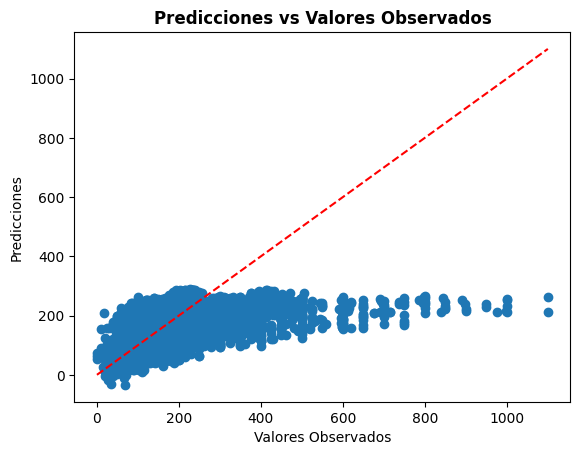

In [77]:
# Grafico de dispersión
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Línea regresion
plt.xlabel("Valores Observados")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Observados",  fontweight="bold")
plt.show()